In [50]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [51]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [52]:
img = mpimg.imread("imgs/1.jpeg")
img = np.ceil(rgb2gray(img))
img

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

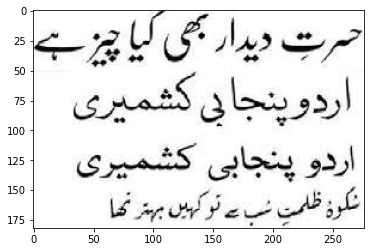

In [53]:
plt.imshow(img, cmap='gray')

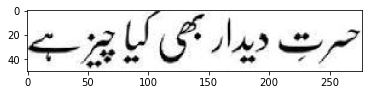

In [54]:
plt.imshow(img[:50], cmap='gray')

In [55]:
levels = []
threshold = np.average(img[img>100])
print(threshold)
previous_average = 0

for i in range(img.shape[0]):
    average = np.average(img[i])
    if(previous_average<threshold):
        previous_average = average
        continue
    if(average<threshold):
        levels.append(i)
    previous_average = average
#     print(average)
    
if(len(levels)%2!=0):
    levels.append(img.shape[0]-1)
    
levels

246.57986786684057


[5, 10, 65, 95, 114, 152]

In [56]:
images = []

for i in range(0, len(levels)-1):
    images.append(img[levels[i]:levels[i+1]])

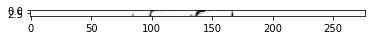

In [57]:
plt.imshow(images[0], cmap='gray')

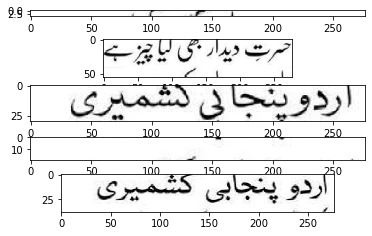

In [58]:
f, axarr = plt.subplots(5,) 

for i in range(5):
    axarr[i].imshow(images[i], cmap='gray')
